# Pythonによる実践統計分析 第4回ハンズオン資料

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as rd

仮説検定はscipy.statsモジュールを利用する。

In [3]:
from scipy import stats as st

## 比率の検定（二項検定）
    - 比率の検定は主に2種類の選択肢を比較しどちらが優位かを確かめるために用いられる。
    - メジャーな使い道は「選挙速報」、「A/Bテスト」。

### 二項分布
    - 二項分布は、確率pで表が出る（確率1-pで裏が出る）コインをN回投げた場合に表がm回出る確率を表す。
    - コイン（二種類の選択肢が同じ確率）の場合はp = 1/2となる。

### 二項分布のグラフ
    - コイン投げの回数Nとコインの表の出る確率pを変化させてグラフを描いてみましょう。

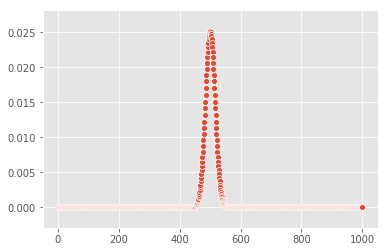

In [7]:
(N, p) = 1000, 0.5
x = [i for i in range(N + 1)]
y = [st.binom.pmf(i, N, p) for i in range(N + 1)]

sns.scatterplot(x,y)


### 仮説検定

#### 例1: サンプル数が少ない場合
    - 20人に内閣支持率をヒアリングしたところ、「支持する」が12名、「支持しない」が8名となり、調査での支持率は60%となった。
    - この数字でどの程度支持率が60%であると言えるか？

In [10]:
def judgement(p):
    if p <= 0.05:
        print("帰無仮説は5%の有意水準で棄却できる")
    else:
        print("帰無仮説は5%の有意水準で棄却できない")

In [11]:
p = st.binom_test(12, 20, 0.5)
print("p値 = {:.3f}".format(p))
judgement(p)


p値 = 0.503
帰無仮説は5%の有意水準で棄却できない


#### 例2: サンプル数が多い場合
    - 1,000人に内閣支持率をヒアリングしたところ、「支持する」が600名、「支持しない」が400名となり、調査での支持率は60%となった。
    - この数字でどの程度支持率が60%であると言えるか？

In [20]:
p = st.binom_test(600, 1000, 0.5)
print("p値 = {:.3f} 3桁表示".format(p))
print("p値 = {:.10f} 10桁表示".format(p))
judgement(p)

p値 = 0.000 3桁表示
p値 = 0.0000000003 10桁表示
帰無仮説は5%の有意水準で棄却できる


#### 例3: サンプル数が少ないが極端な例が出た場合
    - 20人に内閣支持率をヒアリングしたところ、「支持する」が19名、「支持しない」が1名となり、調査での支持率は95%となった。
    - この数字でどの程度支持率が95%であると言えるか？

In [16]:
p = st.binom_test(19, 20, 0.5)
print("p値 = {:.3f} 3桁表示".format(p))
print("p値 = {:.10f} 10桁表示".format(p))
judgement(p)

p値 = 0.000 3桁表示
p値 = 0.0000400543 10桁表示
帰無仮説は5%の有意水準で棄却できる


## 平均値の差の検定（対応なしのt検定）
    - 比較対象となる2種類の群の平均値の差が優位かどうかを確かめる。
    - 薬の投薬効果判定など、何かを行った際の効果を判定するために用いられる。
    - 2つの群が別々の対象で行った場合を「対応なし」という。

In [21]:
d1 = rd.normal(1.0, 2.0, 100) # 平均値1.0,標準偏差2.0の分布を100人分
d2 = rd.normal(3.0, 2.0, 100) # 平均値3.0,標準偏差2.0の分布を100人分

In [23]:
d = pd.concat([
    pd.DataFrame(d1, columns=["A"]),
    pd.DataFrame(d2, columns=["B"])],
    axis=1)
d.head()

,A,B
0,5.099234,3.450598
1,-3.187637,6.951479
2,-2.452275,6.713764
3,2.826216,4.287887
4,3.456998,4.781682


In [26]:
pd.melt(d, var_name="team", value_name="score").head()

,team,score
0,A,5.099234
1,A,-3.187637
2,A,-2.452275
3,A,2.826216
4,A,3.456998


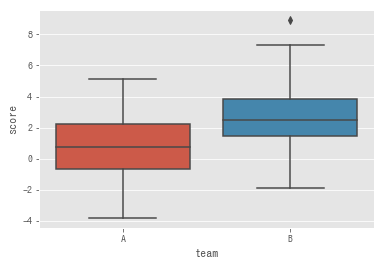

In [95]:
sns.boxplot(
    x = "team", 
    y = "score", 
    data=pd.melt(d, var_name="team", value_name="score"))

In [96]:
m1 = d.A.mean()
m2 = d.B.mean()
t, p = stats.ttest_ind(d.A, d.B) # t: t値, p: p値

print("平均値1 = {:.3f}".format(m1))
print("平均値2 = {:.3f}".format(m2))
print("平均値の差 = {:.3f}".format(m1 - m2))
print("p値 = {:.3f}".format(p))

# H1: チームAとチームBの平均値の差は意味がある（どちらかが強い）
# H0: チームAとチームBの平均値の差はたまたま出たものである（どちらかが強いとは言えない）

平均値1 = 0.702
平均値2 = 2.711
平均値の差 = -2.009
p値 = 0.000


## 独立性の検定
    - 2つの群が独立かどうかを検定する。
    - 相関係数の検定に用いる。

### 例1: 独立な乱数データ

In [97]:
d1 = rd.normal(1.0, 2.0, 100)
d2 = rd.normal(3.0, 2.0, 100)

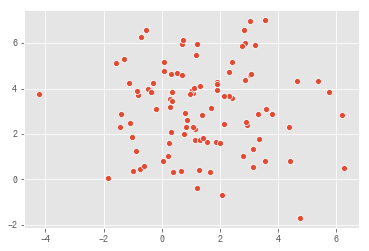

In [98]:
sns.scatterplot(d1, d2)

In [99]:
r, p = stats.pearsonr(d1, d2)
print("相関係数 = {:.3f}".format(r))
print("p値 = {:.3f}".format(p))

# H1: 二つの変数に関係がある
# H0: 二つの変数は独立である（関係がない）

相関係数 = -0.029
p値 = 0.778


### 例2: 相関のある乱数データ

In [37]:
m = np.array([1.0, 2.0])       # 平均値ベクトル
s = np.array([2.0, 2.0])       # 標準偏差ベクトル
r = np.array([[1.0, 0.3],      # 相関係数行列
     [0.3, 1.0]])

# s * r * s : 分散共分散行列 -> 二つの変数が関係あることを表す

# multivariate_normal : 多次元正規分布乱数
d = pd.DataFrame(rd.multivariate_normal(m, s * r * s, 1000), columns=["A", "B"])
d1 = d.A
d2 = d.B

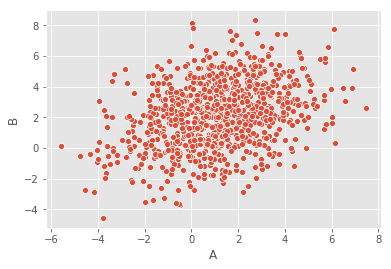

In [38]:
sns.scatterplot(d1, d2)

In [39]:
r, p = st.pearsonr(d1, d2)
print("相関係数 = {:.3f}".format(r))
print("p値 = {:.3f}".format(p))

相関係数 = 0.328
p値 = 0.000
